1. Load data
2. Clean data
3. Split data
4. Train model
5. Evaluate model
6. Save model


In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [30]:
'''# data scaping and loading 
import pandas as pd
import yfinance as yf
sp500=yf.Ticker("^GSPC")
sp500=sp500.history(period="ma'''")


SyntaxError: unterminated string literal (detected at line 5) (989176408.py, line 5)

In [31]:
#data=sp500

In [32]:
#data.to_csv("sp500.csv")

In [33]:
df=pd.read_csv("sp500.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24594 entries, 0 to 24593
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24594 non-null  object 
 1   Open          24594 non-null  float64
 2   High          24594 non-null  float64
 3   Low           24594 non-null  float64
 4   Close         24594 non-null  float64
 5   Volume        24594 non-null  int64  
 6   Dividends     24594 non-null  float64
 7   Stock Splits  24594 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


<Axes: xlabel='Date'>

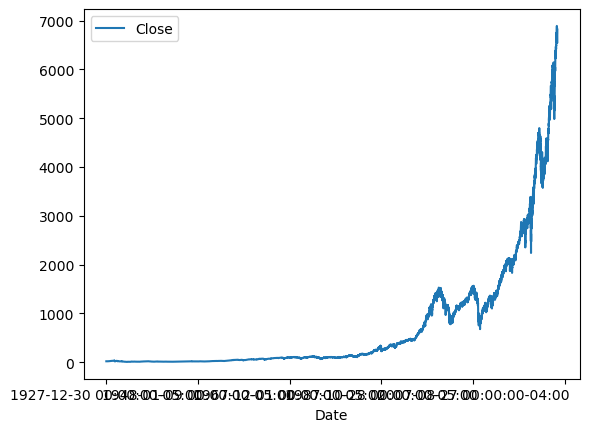

In [35]:
df.plot.line(y="Close",x='Date')

In [36]:
del df['Dividends']
del df['Stock Splits']

In [37]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [38]:
df ['Tommorow']= df['Close'].shift(-1)

In [39]:
df['target']=(df['Tommorow'] > df['Close']).astype(int)

In [40]:
df

,Date,Open,High,Low,Close,Volume,Tommorow,target
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...,...
24589,2025-11-20 00:00:00-05:00,6737.930176,6770.350098,6534.049805,6538.759766,5596080000,6602.990234,1
24590,2025-11-21 00:00:00-05:00,6555.770020,6660.049805,6521.919922,6602.990234,5929930000,6705.120117,1
24591,2025-11-24 00:00:00-05:00,6636.540039,6715.750000,6630.700195,6705.120117,6039740000,6765.879883,1
24592,2025-11-25 00:00:00-05:00,6697.029785,6776.399902,6659.979980,6765.879883,5003330000,6812.609863,1


In [41]:
df.set_index('Date', inplace=True)


In [42]:
df

,Open,High,Low,Close,Volume,Tommorow,target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-11-20 00:00:00-05:00,6737.930176,6770.350098,6534.049805,6538.759766,5596080000,6602.990234,1
2025-11-21 00:00:00-05:00,6555.770020,6660.049805,6521.919922,6602.990234,5929930000,6705.120117,1
2025-11-24 00:00:00-05:00,6636.540039,6715.750000,6630.700195,6705.120117,6039740000,6765.879883,1


In [43]:
df=df.loc['1990-01-01':].copy()

In [44]:
df

,Open,High,Low,Close,Volume,Tommorow,target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-11-20 00:00:00-05:00,6737.930176,6770.350098,6534.049805,6538.759766,5596080000,6602.990234,1
2025-11-21 00:00:00-05:00,6555.770020,6660.049805,6521.919922,6602.990234,5929930000,6705.120117,1
2025-11-24 00:00:00-05:00,6636.540039,6715.750000,6630.700195,6705.120117,6039740000,6765.879883,1


Training

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_RF=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)


In [49]:
train=df.iloc[:-100]
test=df.iloc[-100:]

pridictor=['Open','High','Low','Close','Volume']
model_RF.fit(train[pridictor],train['target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score

In [52]:
preds=model_RF.predict(test[pridictor])

In [53]:
preds=pd.Series(preds,index=test.index)

In [60]:
print(precision_score(test['target'],preds))

0.0


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
accuracy_score(test['target'],preds)

0.41

In [59]:
print(classification_report(test['target'],preds))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        41
           1       0.00      0.00      0.00        59

    accuracy                           0.41       100
   macro avg       0.20      0.50      0.29       100
weighted avg       0.17      0.41      0.24       100



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
